In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as io
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [50]:
#load the data
trX = io.loadmat('train_32x32.mat')['X']
trY = io.loadmat('train_32x32.mat')['y']
tsX = io.loadmat('test_32x32.mat')['X']
tsY = io.loadmat('test_32x32.mat')['y']

In [51]:
from keras.utils import to_categorical
#one-hot encode the labels
trY = to_categorical(trY)
tsY = to_categorical(tsY)

In [52]:
# normalize the pixel values to restrict between 0 and 1
trX = np.array(trX)
trX = trX/255
tsX = np.array(tsX)
tsX = tsX/255
# reshape to format expected by the model
trX = trX.reshape(len(trX), 32, 32, 3)
tsX = tsX.reshape(len(tsX), 32, 32, 3)

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#creating the model
model = Sequential()
# adding individual layers of the model as per specifications
model.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape=(32,32,3)))
# flatten to connect the convolutional layers to dense/connected layers
model.add(Flatten())
model.add(Dense(3072, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [54]:
# compile the model with specified learning rate and optimizer
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
#train the model
res = model.fit(trX, trY, validation_data=(tsX, tsY), epochs=20)

Epoch 1/20
2290/2290 [==============================] - 14s 6ms/step - loss: 2.2491 - accuracy: 0.1848 - val_loss: 2.2030 - val_accuracy: 0.2056
Epoch 2/20
2290/2290 [==============================] - 12s 5ms/step - loss: 2.0262 - accuracy: 0.2833 - val_loss: 1.1237 - val_accuracy: 0.6479
Epoch 3/20
2290/2290 [==============================] - 12s 5ms/step - loss: 0.7632 - accuracy: 0.7770 - val_loss: 0.6639 - val_accuracy: 0.8111
Epoch 4/20
2290/2290 [==============================] - 13s 6ms/step - loss: 0.5434 - accuracy: 0.8433 - val_loss: 0.5905 - val_accuracy: 0.8332
Epoch 5/20
2290/2290 [==============================] - 12s 5ms/step - loss: 0.4507 - accuracy: 0.8668 - val_loss: 0.4805 - val_accuracy: 0.8610
Epoch 6/20
2290/2290 [==============================] - 12s 5ms/step - loss: 0.3905 - accuracy: 0.8837 - val_loss: 0.4506 - val_accuracy: 0.8699
Epoch 7/20
2290/2290 [==============================] - 12s 5ms/step - loss: 0.3583 - accuracy: 0.8944 - val_loss: 0.4241 - val_ac

In [56]:
# extract the training and testing error from model run
tr_loss = res.history['loss']
ts_loss = res.history['val_loss']
tr_acc = res.history['accuracy']
ts_acc = res.history['val_accuracy']
epochs = [i for i in range(0, 20)]

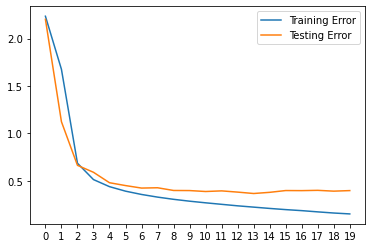

In [57]:
# plotting the training and testing error against epochs
import matplotlib.pyplot as plt
plt.xticks(np.arange(0, len(epochs)+1, 1))
plt.plot(epochs, tr_loss, label='Training Error')
plt.plot(epochs, ts_loss, label='Testing Error')
plt.legend()
plt.show()